#### Татур А.А.
#### 18.09.2022
#### ver 0.1

# Задание

## C использованием библиотек Numpy и Pandas написать программу реализующую:

1. Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.

2. Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).

3. Подсчет длин предложений и их количества.

4. Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".

5. Построение гистограммы частоты встречаемости слов.

# Цели

#### Анализ числа слов и самых часто встречающихся

1. Открываем текстовый файл, читаем построчно, заносим результат в список.
2. Выполняем пословное чтение списка (при помощи вложенных циклов for)
3. С помощью регулярных выражений убираем специальные символы
4. С помощью заранее сформированного файла с "мусорными" словами проверяем не относится ли анализируемое слово к числу, предлогу, междометию, местоимению и др. и убираем лишнее.
5. Добавляем отобранные слова в отдельный список. Все слова ставим в нижний регистр. Сортируем список по алфавиту
6. Проводим лемматизацию с помощтю модуля pymystem3
7. Заносим полученные слова в DataFrame. 1-я колонка - слово с окончанием, 2-я колонка - Лемматизированные
8. Строим график для 20 самых частых слов используя seaborn


##### Анализ длины предложений и их числа.

1. Открываем файл, читаем построчно, заносим результат в список.
2. Анализируем построчно с помощью регулярных выражений. В места конца строки (.?1 + пробел, слово+.?1) вставляем специальный символ "|"
3. Объединяем все элементы списка в один строчный файл, выполняем его разделением по символу "|". Получаем список, состоящий из отдельных предложений.
4. Выполняем их подсчет.
5. Заносим в DataSeries, где index - само предложение, а значение - его длина, посчитанная при помощи функции map()

In [18]:
import pandas as pd
import codecs
import re
import matplotlib.pyplot as plt
import seaborn as sns

from pymystem3 import Mystem

# Считаем слова

##### Открываем файл

In [19]:
with open("MyText.txt", "r", encoding = "UTF8") as text_file:
    text=text_file.readlines()

#### Создаем переменную, которая будет содержать обработанный текст.
#### Подгружаем файл, содержащий пустые по смыслу слова

In [37]:
with open ("Trash.txt", "r", encoding = "UTF8") as trash_file:
    trash_word = tuple(trash_file.readlines()[0].split())

##### Выполняем построчное чтение, разбиваем предложения по пробелам для вычленения отдельных слов, чистим от специальных символов, пустых слов, переводим все в нижний регистр, сортируем по алфавиту

In [50]:
text_cleaned=[] #пустой лист, где будет содержаться наш очищенный от мусорных слов текст

for line in text: #Выделяем отдельные строки
    for word in line.split(): #Разбиваем на части по пробелам
        word = re.sub("[!#$%^&*\(\)...''\"«»–\'\'?,-<>1234567890]", '', word) #удаляем специальные символы и цифры
        if word.lower() in trash_word or len(word)<1: #удаляем слова без смысла, пустые символы
            continue
        else:
            text_cleaned.append(word.lower())
            
sorted_and_cleaned = sorted(text_cleaned) #очищенный лист, который отсортирован по алфавиту

#### Выполняем лемматизацию

In [25]:
string=' '.join(sorted_and_cleaned) #объединяем все слова в единую строку для скорости работы PyMystream3. Если выдергивать
mystem = Mystem()                   # по одному слову из списка, то получается очень долго
text_lemma=mystem.lemmatize(string)

In [44]:
text_lemma=[word for word in text_lemma if word!=' ' or word!=''] # Разделяем строку обратно на отдельные слова.

#### Вносим в объект DataFrame два списка - лемматизированные и нет. Записываем в файл.

In [64]:
Word_Data=pd.DataFrame({"Orig": sorted_and_cleaned, "Mod":text_lemma[:-1]}) # лемматизированный список не включает последний 
Word_Data.to_csv('Word_Data.csv')                                           # пустой элемент, который добавляет
Word_Data.tail                                                            # лемматизатор   


<bound method NDFrame.tail of            Orig       Mod
0       абабков   абабков
1       абабков   абабков
2      абадонна  абадонна
3      абадонна  абадонна
4      абадонна  абадонна
...         ...       ...
66928     ящике      ящик
66929     ящике      ящик
66930     ящике      ящик
66931     ящики      ящик
66932     ящики      ящик

[66933 rows x 2 columns]>

#### Выдергиваем 20 самых частых

In [65]:
mf = Word_Data['Mod'].value_counts()
mf.head(20)

маргарита      621
сказать        469
рука           368
иван           353
человек        349
глаз           346
отвечать       341
быть           274
говорить       268
прокуратор     267
воланд         265
знать          255
спрашивать     247
голова         246
кот            233
лицо           230
становиться    225
коровьев       224
время          214
пилат          196
Name: Mod, dtype: int64

#### Строим график для 20 наиболее часто встречающихся 

<AxesSubplot:title={'center':'Сколько раз встретились самые популярные слова?'}, xlabel='Название слова', ylabel='Mod'>

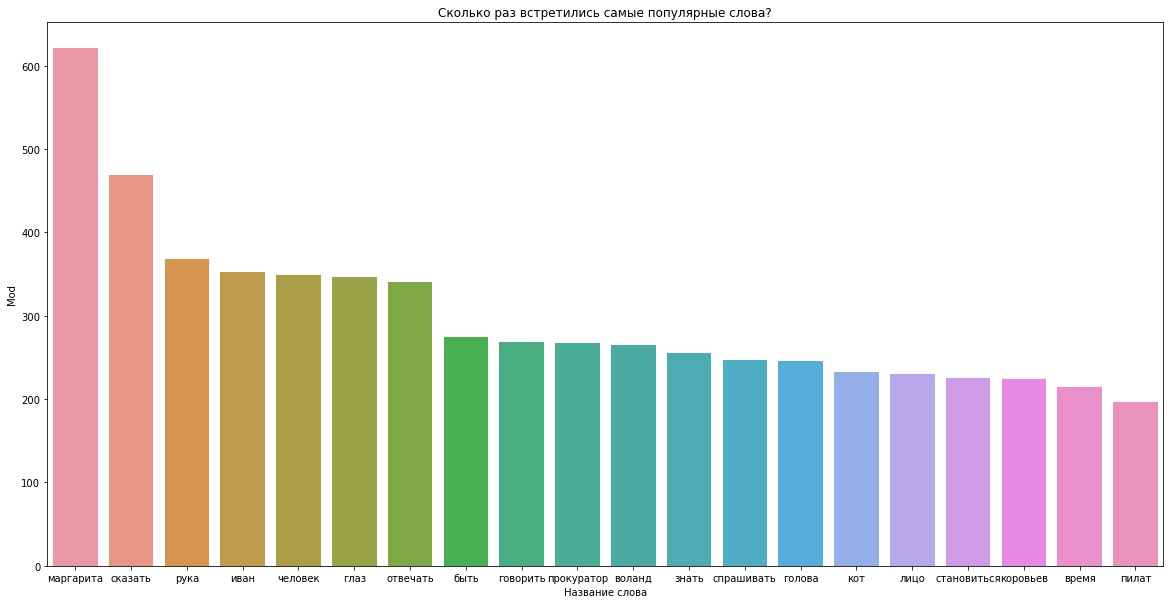

In [66]:
## настройки графика

plt.figure(figsize=(20,10))
plt.title("Сколько раз встретились самые популярные слова?")
plt.ylabel("Число упоминаний")
plt.xlabel("Название слова")

x=20 # Переменная для определения, частоту скольких первых слов отобразить на графике
sns.barplot(x=mf.head(x).index, y=mf.head(x))

# Считаем предложения

#### Открываем файл

In [2]:
with open("MyText.txt", "r", encoding = "UTF8") as text_file:
    text=text_file.readlines()

#### Убираем из файла все символы новой строки, а также дефисы, которые обозначают диалоги.  Используем гипотезу, что все предложения заканчиваются на ". ", "! " или "? ". Выполняем их поиск по тексту и заменяем специальным символом "|"

In [51]:
new_text=[]
for line in text:
    line=re.sub(r'[–]', '',line) #убираем начальные символы диалогов
    line=re.sub(r'[.!?»]\n', r'|', line) #обозначаем конец предложений, где знака идет новая строка
    line=re.sub(r'[.!?]\s', r'|', line) #бозначаем конец предложений, где после точки, восклицательного знака или вопроса идет пробел
    line=re.sub(r"[\w']+[\.?!]", r'|', line) #обозначаем, где после слова идет точка как конеч предложения. 
    line=re.sub(r'\n', '',line) #убираем символ новой строки
    new_text.append(line)

#### Соединяем все элементы листа в строку и преобразуем ее в новый лист по делителю "|". Считаем количество предложений как длину списка

In [52]:
new_file=(''.join(new_text)).split('|')
len(new_file)

10054

#### Добавляем все сведения в DataSeries, где индекс - само предложение, а значение - его длина.

In [53]:
Sent_Data=pd.Series(list(map(len, new_file)), index=new_file) 
Sent_Data.to_csv('Sent_Data.csv')
Sent_Data.head(20)

Михаил БулгаковМастер и МаргаритаМосква 1984ЧАСТЬ ПЕРВАЯ...Так кто ж ты, наконец                                                                                                                                                                                                                                80
 Я  часть той силы,что вечно хочетзла и вечно совершает благо                                                                                                                                                                                                                                                   61
Гете                                                                                                                                                                                                                                                                                                             4
«Фауст                                                                         